## Model: Decision Tree

importing necessary libraries

In [38]:
import numpy as np
import pandas as pd

loading the dataset

In [39]:
df = pd.read_csv("Cleaned_SLU_Opportunity_Wise_Dataset.csv")

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8246 entries, 0 to 8245
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Learner SignUp DateTime  8246 non-null   object
 1   Opportunity Id           8246 non-null   object
 2   Opportunity Name         8246 non-null   object
 3   Opportunity Category     8246 non-null   object
 4   Opportunity End Date     8246 non-null   object
 5   First Name               8246 non-null   object
 6   Date of Birth            8246 non-null   object
 7   Gender                   8246 non-null   object
 8   Country                  8246 non-null   object
 9   Institution Name         8246 non-null   object
 10  Current/Intended Major   8246 non-null   object
 11  Entry created at         8246 non-null   object
 12  Status Description       8246 non-null   object
 13  Status Code              8246 non-null   int64 
 14  Apply Date               8246 non-null  

Full Unique Value Inspection

In [41]:
# Display unique values for each column
for col in df.columns:
    print(f"Column: {col}")
    print(df[col].unique())
    print(f"Number of unique values: {df[col].nunique()}")
    print("-" * 50)

Column: Learner SignUp DateTime
['2023-06-14 12:30:35' '2023-05-01 05:29:16' '2023-04-09 20:35:08' ...
 '2024-03-05 14:30:22' '2024-02-28 17:34:18' '2024-02-29 15:02:31']
Number of unique values: 3805
--------------------------------------------------
Column: Opportunity Id
['00000000-0GN2-A0AY-7XK8-C5FZPP' '00000000-0GHG-N3NG-584M-44MK40'
 '00000000-0GNT-FT74-MZT8-93VC0G' '00000000-0GRA-BD28-CXVV-EYEX21'
 '00000000-0GZY-NNHV-FJWW-PTA9VX' '00000000-0GHB-4N83-QX9K-JM48K2'
 '00000000-0GWQ-AXC5-X45C-2MHJ28' '00000000-10WC-BS50-CYGD-X97ES4'
 '00000000-104G-3FS6-3SV3-JKHVQB' '00000000-10WW-X340-GTVH-RR52VF'
 '00000000-10QW-PYTT-CJCX-7VQBTT' '00000000-10YM-B80K-RNNJ-YAVQ7V'
 '00000000-10S6-HVRK-ZDAM-90C0F8' '00000000-101Y-HSX2-0DFJ-QCKQBR'
 '00000000-10GG-17ZM-AP4T-WQVBGQ' '00000000-10CD-3CAK-3FZK-9VXKRM'
 '00000000-10SA-ZXDA-E05A-N2CGAN' '00000000-101B-RJY9-TVWC-6XG9BH'
 '00000000-106T-FSAJ-KDBX-40ZGNV' '00000000-10RQ-JXA9-NNKD-EW5RCF'
 '00000000-10A5-TYD2-181G-D2J679' '00000000-100J-PM3A-0

Step 1: Define Target Variable

In [42]:
# Define successful and unsuccessful status
success_status = ["Started", "Applied", "Team Allocated", "Rewards Award"]
df['Success'] = df['Status Description'].apply(lambda x: 1 if x in success_status else 0)

# Check the distribution
print(df['Success'].value_counts())


Success
0    4221
1    4025
Name: count, dtype: int64


Step-2: preparing the dataset with relevant features

In [43]:
# Select predictor columns (categorical for now)
predictors = ['Opportunity Category', 'Opportunity Name', 'Country', 'Current/Intended Major']

# Optional: create date-based features
df['SignUp_Month'] = pd.to_datetime(df['Learner SignUp DateTime']).dt.month
df['Opportunity_Start_Month'] = pd.to_datetime(df['Opportunity Start Date']).dt.month

predictors.extend(['SignUp_Month', 'Opportunity_Start_Month'])

# Encode categorical variables using one-hot encoding
df_encoded = pd.get_dummies(df[predictors], drop_first=True)

# Final dataset for Decision Tree
X = df_encoded
y = df['Success']

print(X.shape, y.shape)


(8246, 447) (8246,)


Step-3: Training the Decision Tree

Decision Tree Accuracy: 0.92
|--- Opportunity Category_Internship <= 0.50
|   |--- Opportunity Name_Slide Geeks: A Presentation Design Competition <= 0.50
|   |   |--- Opportunity_Start_Month <= 9.50
|   |   |   |--- Current/Intended Major_Data Science <= 0.50
|   |   |   |   |--- Current/Intended Major_Artificial Intelligence <= 0.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- Current/Intended Major_Artificial Intelligence >  0.50
|   |   |   |   |   |--- class: 1
|   |   |   |--- Current/Intended Major_Data Science >  0.50
|   |   |   |   |--- Country_United States <= 0.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- Country_United States >  0.50
|   |   |   |   |   |--- class: 0
|   |   |--- Opportunity_Start_Month >  9.50
|   |   |   |--- Opportunity Name_Cpr/Aed Certification <= 0.50
|   |   |   |   |--- SignUp_Month <= 3.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- SignUp_Month >  3.50
|   |   |   |   |   |--- class: 1
|   |   |   |--- Opportunit

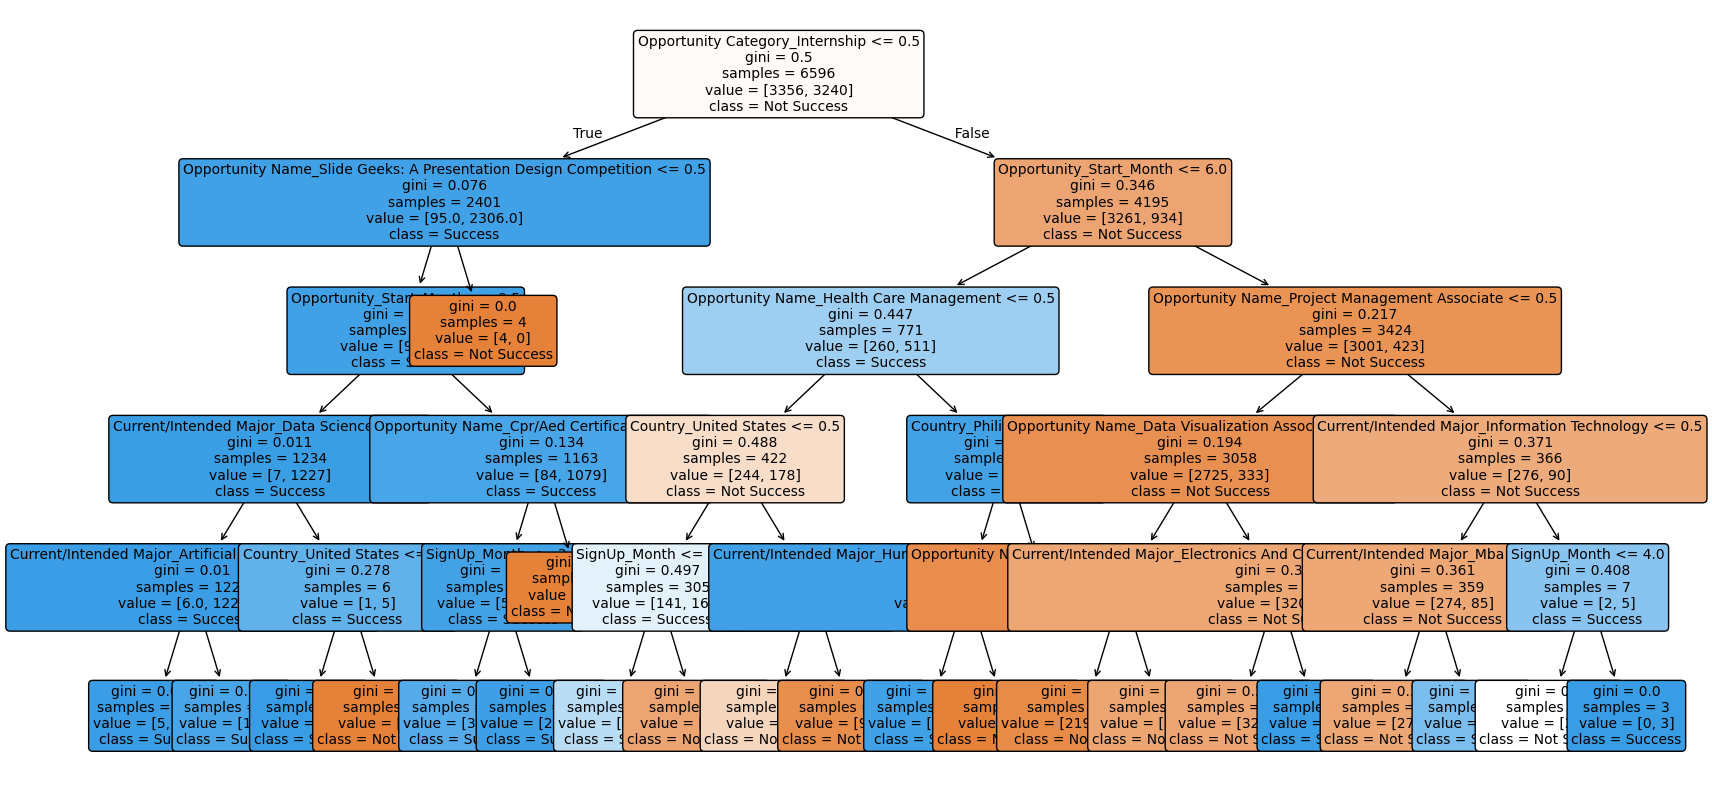

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
import matplotlib.pyplot as plt

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Decision Tree
dtree = DecisionTreeClassifier(max_depth=5, random_state=42)

# Train the model
dtree.fit(X_train, y_train)

# Evaluate accuracy
accuracy = dtree.score(X_test, y_test)
print(f"Decision Tree Accuracy: {accuracy:.2f}")

# Display textual representation of tree
tree_rules = export_text(dtree, feature_names=list(X.columns))
print(tree_rules)

# Plot tree
plt.figure(figsize=(20,10))
plot_tree(dtree, feature_names=X.columns, class_names=['Not Success','Success'], filled=True, rounded=True, fontsize=10)
plt.show()


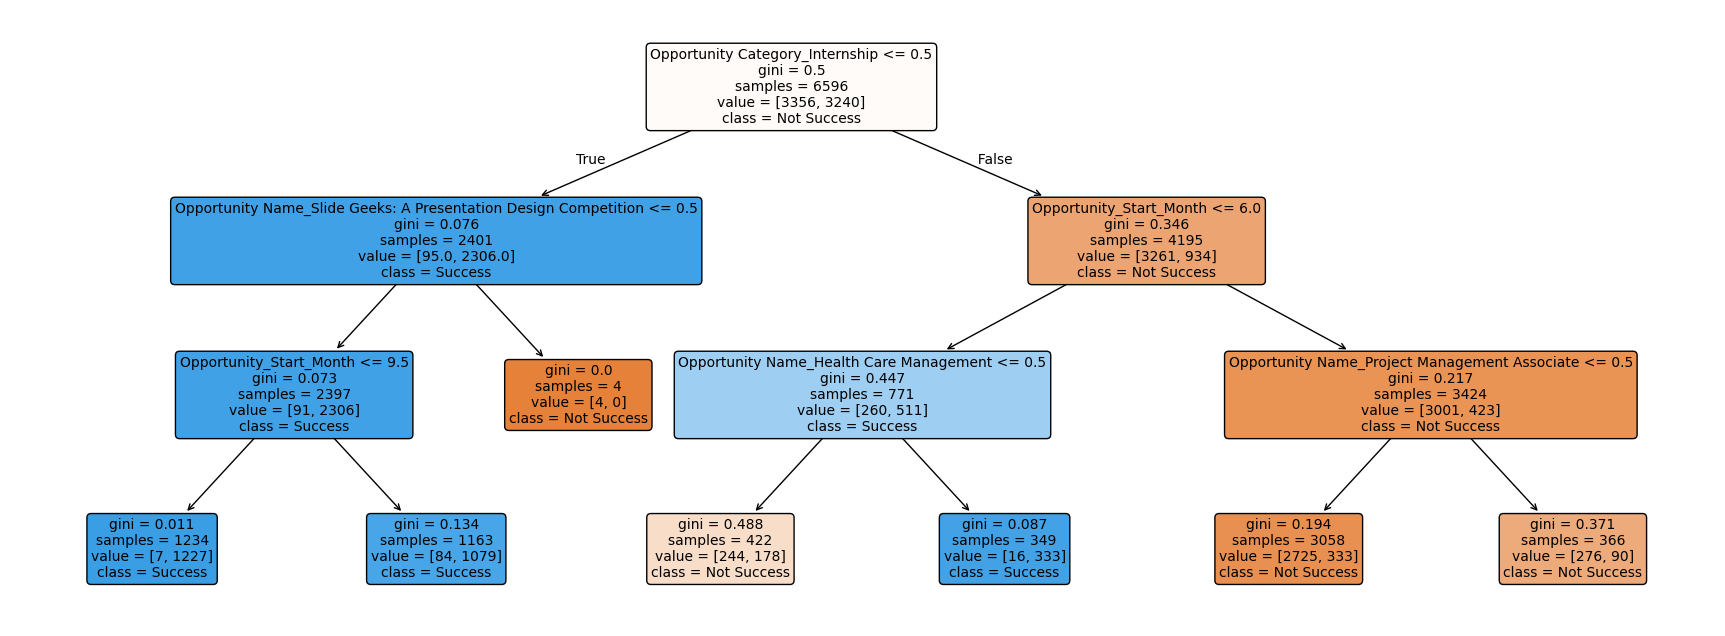

In [45]:
# Decision Tree with smaller depth for visualization
dtree_small = DecisionTreeClassifier(max_depth=3, random_state=42)
dtree_small.fit(X_train, y_train)

plt.figure(figsize=(22,8))
plot_tree(dtree_small, feature_names=X.columns, class_names=['Not Success','Success'], filled=True, rounded=True, fontsize=10)
plt.show()


Use feature importance instead of full tree

In [46]:
importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': dtree.feature_importances_
}).sort_values(by='Importance', ascending=False).head(15)  # Top 15 features

print(importances)

                                               Feature  Importance
5                      Opportunity Category_Internship    0.723049
1                              Opportunity_Start_Month    0.161482
14             Opportunity Name_Health Care Management    0.047092
8               Opportunity Name_Cpr/Aed Certification    0.021483
89                               Country_United States    0.013580
0                                         SignUp_Month    0.008723
10       Opportunity Name_Data Visualization Associate    0.006221
20       Opportunity Name_Project Management Associate    0.005337
12   Opportunity Name_Digital Strategy Virtual Inte...    0.004710
21   Opportunity Name_Slide Geeks: A Presentation D...    0.003215
314      Current/Intended Major_Information Technology    0.001362
243  Current/Intended Major_Electronics And Communi...    0.001034
347                         Current/Intended Major_Mba    0.000927
303  Current/Intended Major_Human Development And F...    0.00

Plot a horizontal bar chart for top features

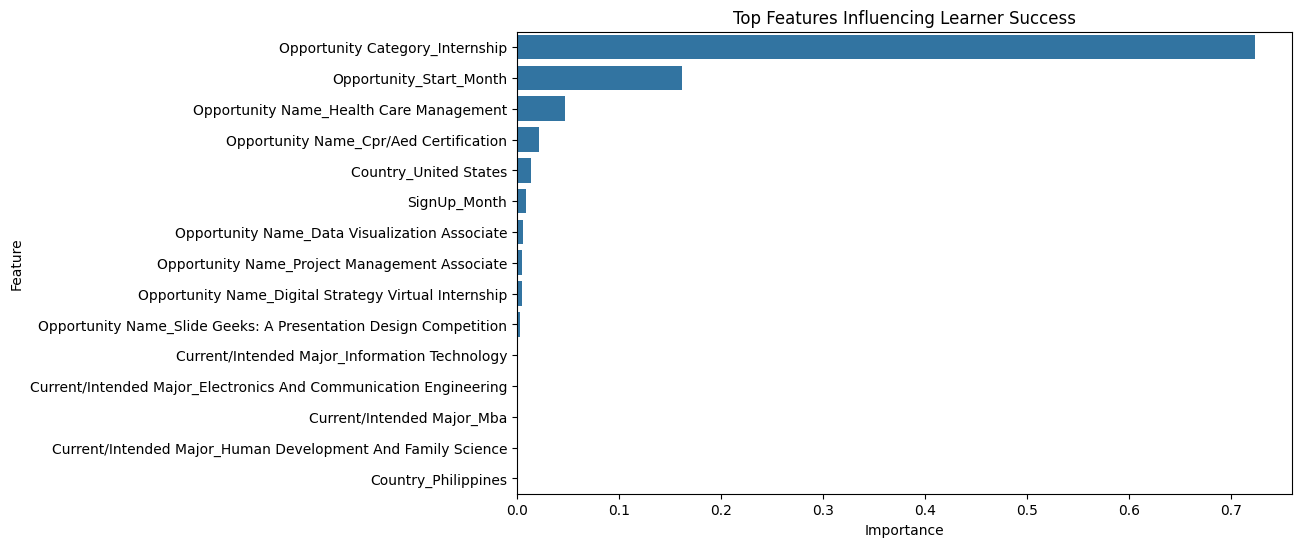

In [47]:
import seaborn as sns

plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=importances)
plt.title('Top Features Influencing Learner Success')
plt.show()


### Decision Tree Model Performance

Decision Tree Accuracy: 0.92


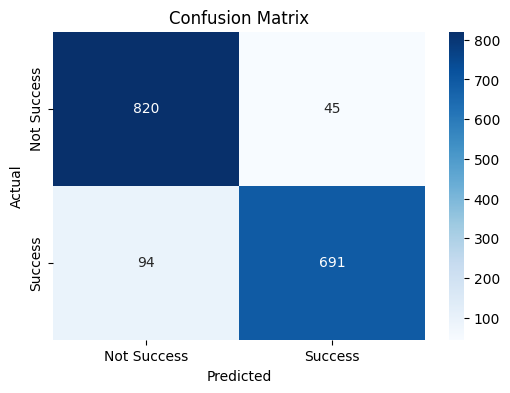

Classification Report:
              precision    recall  f1-score   support

 Not Success       0.90      0.95      0.92       865
     Success       0.94      0.88      0.91       785

    accuracy                           0.92      1650
   macro avg       0.92      0.91      0.92      1650
weighted avg       0.92      0.92      0.92      1650

AUC Score: 0.95


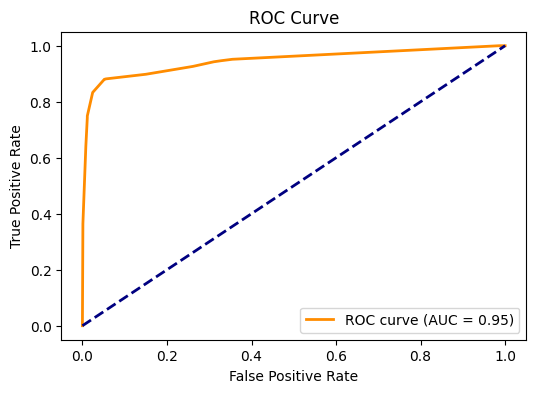

In [48]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import seaborn as sns
import matplotlib.pyplot as plt

# Train Decision Tree (simplified)
dtree_perf = DecisionTreeClassifier(max_depth=5, random_state=42)
dtree_perf.fit(X_train, y_train)

# Predictions
y_pred = dtree_perf.predict(X_test)
y_pred_proba = dtree_perf.predict_proba(X_test)[:,1]  # probability for positive class

# Accuracy
accuracy = dtree_perf.score(X_test, y_test)
print(f"Decision Tree Accuracy: {accuracy:.2f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Success','Success'], yticklabels=['Not Success','Success'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Classification Report
report = classification_report(y_test, y_pred, target_names=['Not Success', 'Success'])
print("Classification Report:")
print(report)

# AUC-ROC
auc_score = roc_auc_score(y_test, y_pred_proba)
print(f"AUC Score: {auc_score:.2f}")

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc_score:.2f})')
plt.plot([0,1], [0,1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


## Visualizations

Compact Decision Tree Visualization

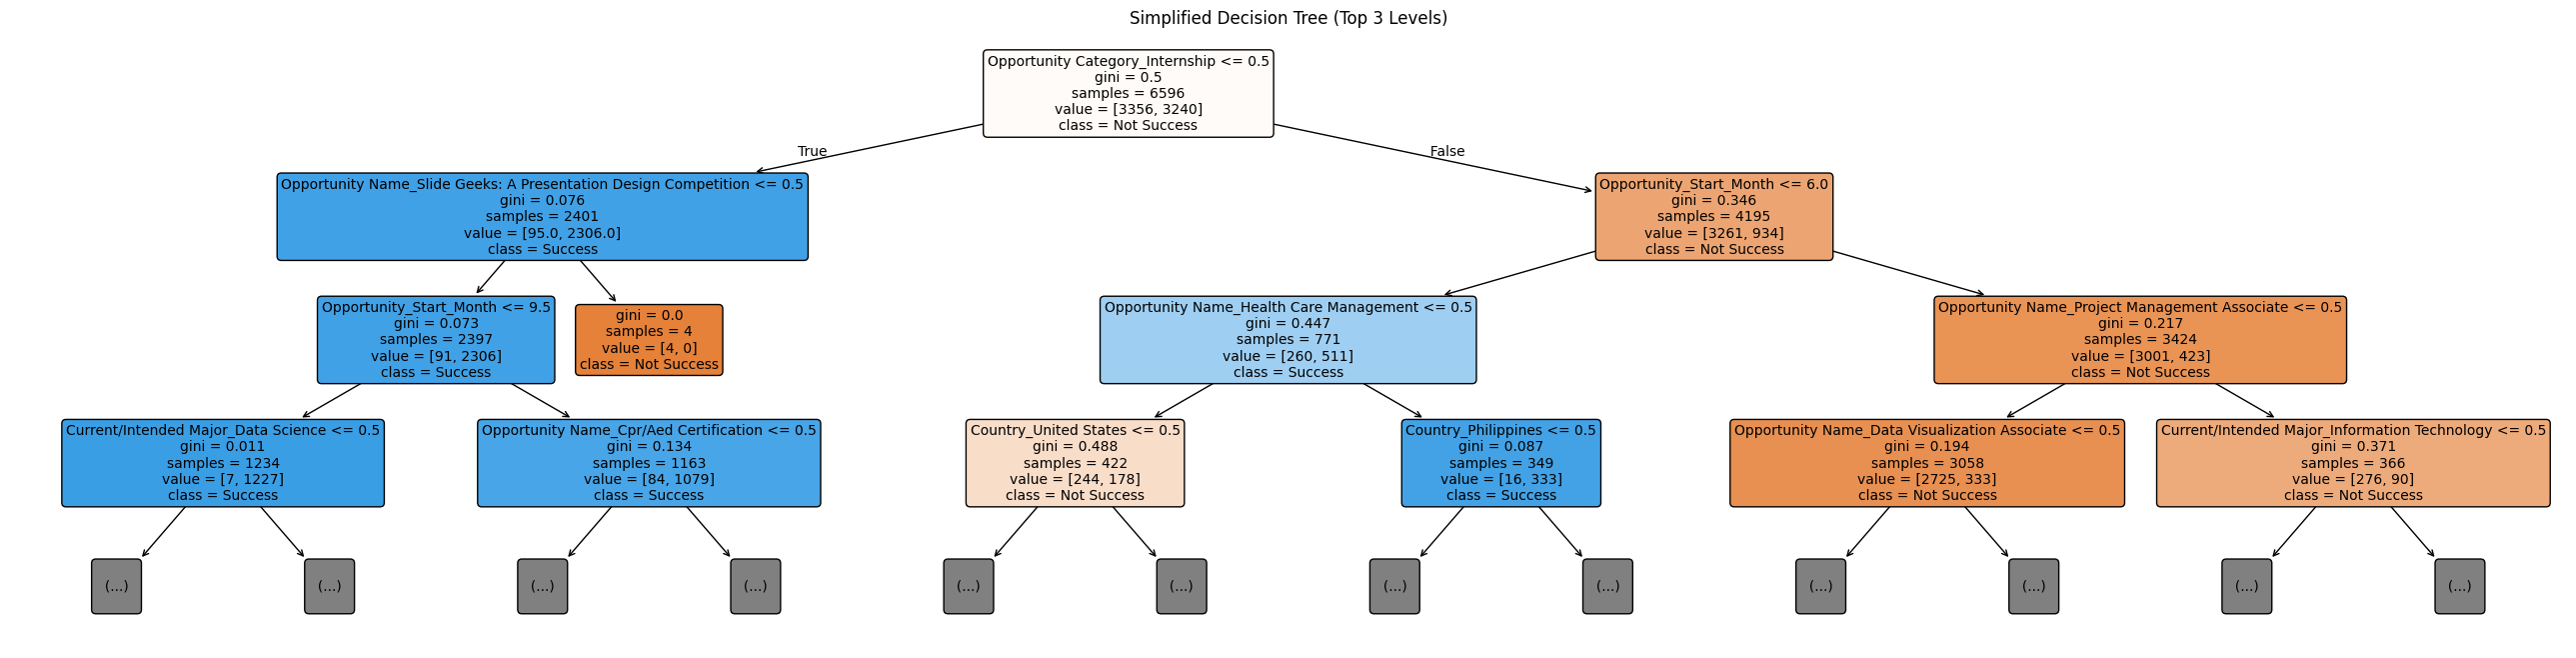

In [49]:
from sklearn.tree import plot_tree

# Plot a simplified tree (max depth 3 for clarity)
plt.figure(figsize=(33,8))
plot_tree(dtree_perf, max_depth=3, feature_names=X_train.columns, class_names=['Not Success','Success'],
          filled=True, rounded=True, fontsize=10)
plt.title("Simplified Decision Tree (Top 3 Levels)")
plt.show()


Feature Importance (Top 10)

In [50]:
# Extract feature importance
importances = pd.Series(dtree_perf.feature_importances_, index=X_train.columns)

# Sort and get top 10
top_features = importances.sort_values(ascending=False).head(10)

# Display the top 10 features
print("Top 10 Features Influencing Learner Success:\n")
for i, (feature, importance) in enumerate(top_features.items(), 1):
    print(f"{i}. {feature:<50} Importance: {importance:.3f}")


Top 10 Features Influencing Learner Success:

1. Opportunity Category_Internship                    Importance: 0.723
2. Opportunity_Start_Month                            Importance: 0.161
3. Opportunity Name_Health Care Management            Importance: 0.047
4. Opportunity Name_Cpr/Aed Certification             Importance: 0.021
5. Country_United States                              Importance: 0.014
6. SignUp_Month                                       Importance: 0.009
7. Opportunity Name_Data Visualization Associate      Importance: 0.006
8. Opportunity Name_Project Management Associate      Importance: 0.005
9. Opportunity Name_Digital Strategy Virtual Internship Importance: 0.005
10. Opportunity Name_Slide Geeks: A Presentation Design Competition Importance: 0.003


C:\Users\sumai\AppData\Local\Temp\ipykernel_29020\1016296823.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




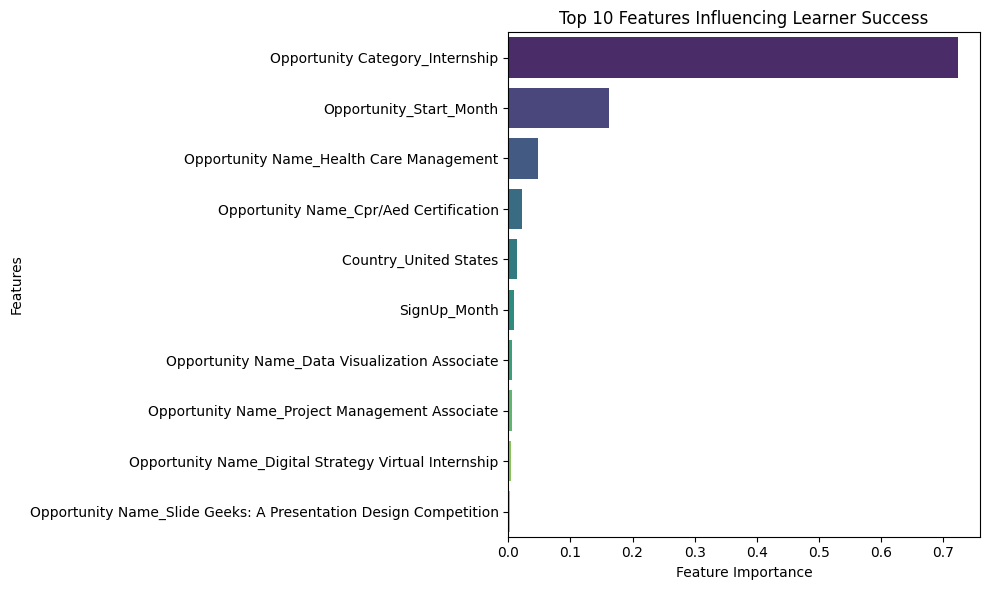

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot Top 10 Feature Importances
plt.figure(figsize=(10,6))
sns.barplot(x=top_features.values, y=top_features.index, palette="viridis")
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Top 10 Features Influencing Learner Success")
plt.tight_layout()
plt.show()


Funnel Chart (Opportunity Status Flow)

In [52]:
import plotly.express as px

# Count learners in each status
status_counts = df['Status Description'].value_counts().reset_index()
status_counts.columns = ['Status', 'Count']

# Sort status for funnel
status_order = ['Applied', 'Team Allocated', 'Started', 'Waitlisted', 'Rewards Award', 'Dropped Out', 'Withdraw', 'Rejected']
status_counts['Status'] = pd.Categorical(status_counts['Status'], categories=status_order, ordered=True)
status_counts = status_counts.sort_values('Status')

# Funnel chart
fig = px.funnel(status_counts, x='Count', y='Status', title='Learner Opportunity Status Funnel')
fig.show()


Progression / Step Bar Charts (SignUp Month → Success)

C:\Users\sumai\AppData\Local\Temp\ipykernel_29020\558564521.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




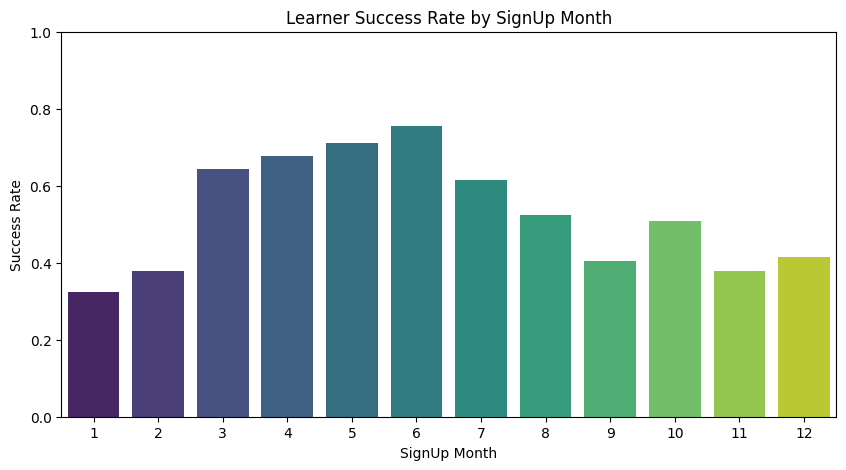

In [53]:
# Aggregate success rate by SignUp Month
success_by_signup = df.groupby('SignUp_Month')['Success'].mean().reset_index()

plt.figure(figsize=(10,5))
sns.barplot(x='SignUp_Month', y='Success', data=success_by_signup, palette='viridis')
plt.ylabel('Success Rate')
plt.xlabel('SignUp Month')
plt.title('Learner Success Rate by SignUp Month')
plt.ylim(0,1)
plt.show()


Heatmap of Engagement vs Success

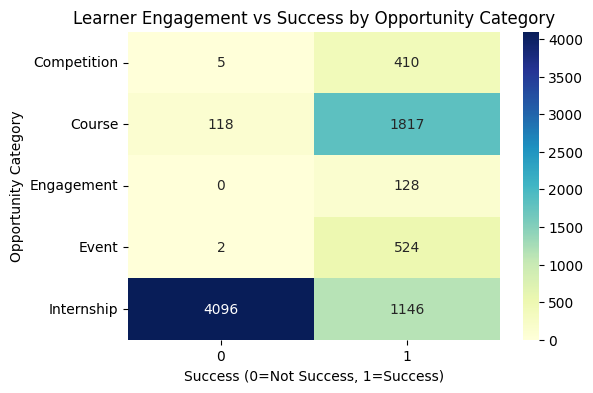

In [54]:
# Create a pivot table
heatmap_data = df.pivot_table(index='Opportunity Category', columns='Success', values='Opportunity Id', aggfunc='count', fill_value=0)

plt.figure(figsize=(6,4))
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Learner Engagement vs Success by Opportunity Category')
plt.ylabel('Opportunity Category')
plt.xlabel('Success (0=Not Success, 1=Success)')
plt.show()


Distribution Plots

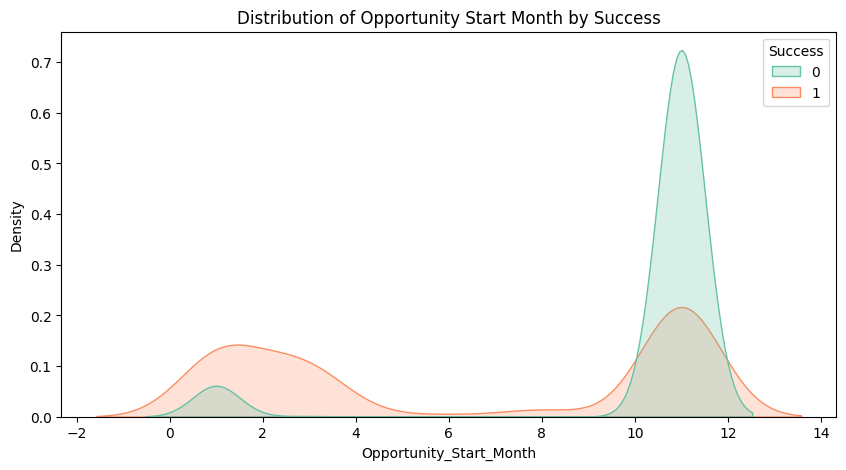

In [55]:
plt.figure(figsize=(10,5))
sns.kdeplot(data=df, x='Opportunity_Start_Month', hue='Success', fill=True, common_norm=False, palette='Set2')
plt.title('Distribution of Opportunity Start Month by Success')
plt.show()


### Advanced Additinal Visualizations

Cumulative Gain / Lift Chart

In [56]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Assuming X and y are your features and target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Predictions and predicted probabilities
y_pred = dt_model.predict(X_test)
y_pred_proba = dt_model.predict_proba(X_test)[:, 1]  # Probability of Success


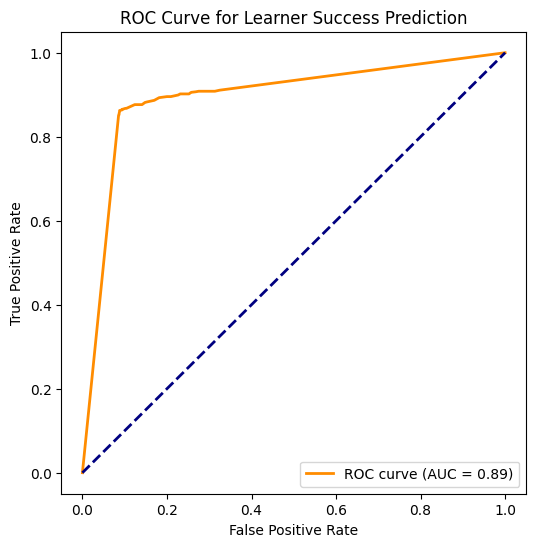

In [57]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0,1], [0,1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Learner Success Prediction')
plt.legend(loc="lower right")
plt.show()


Predict probabilities for the entire dataset

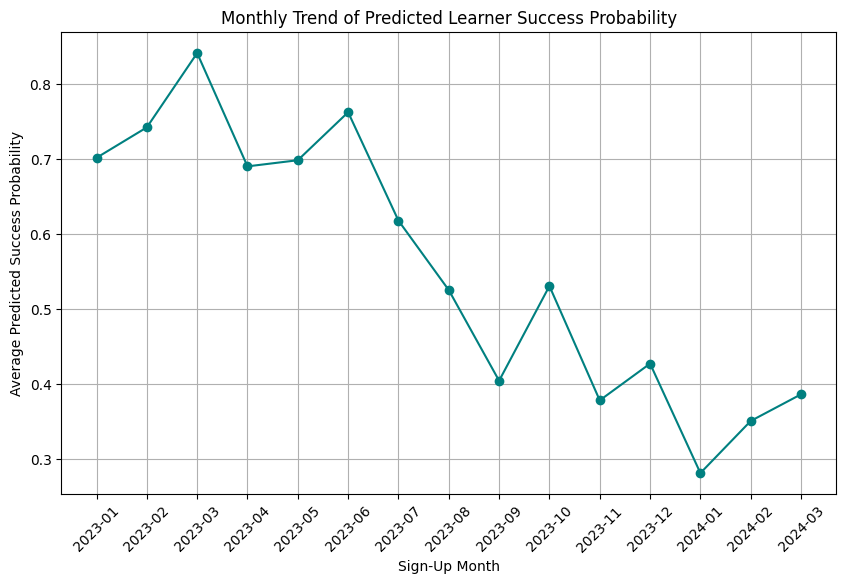

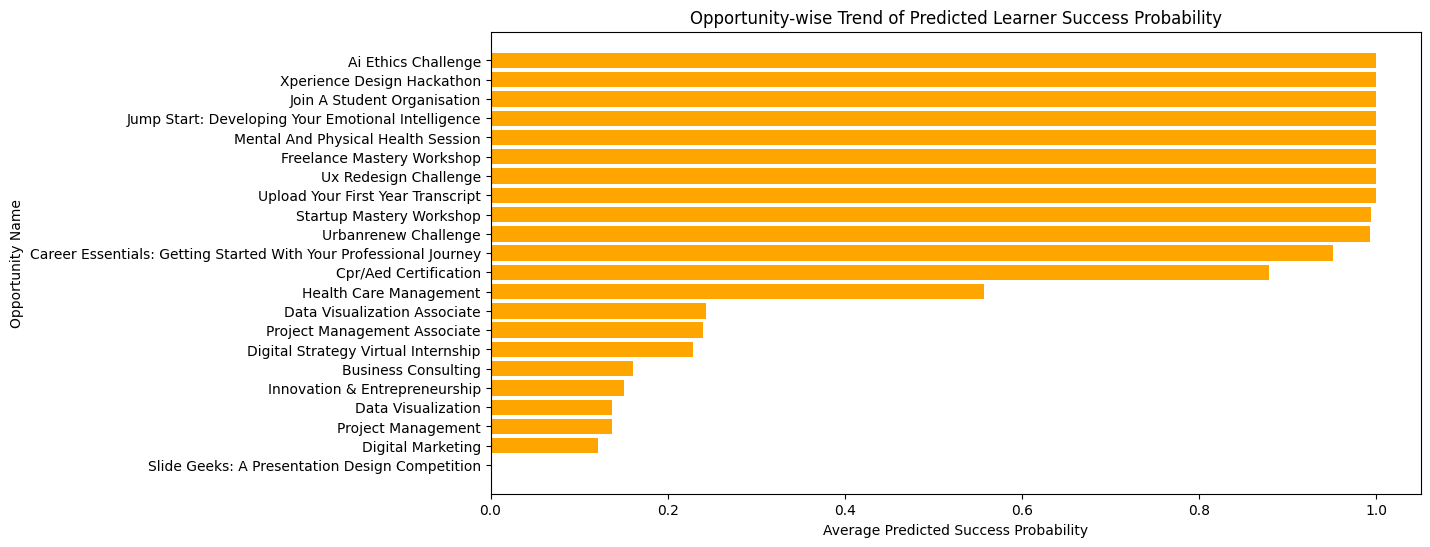

In [60]:
import pandas as pd
import matplotlib.pyplot as plt

# --- Step 1: Predict probabilities for the full dataset ---
y_pred_proba_full = dt_model.predict_proba(X)[:, 1]  # probability of Success
df['Predicted_Success_Prob'] = y_pred_proba_full

# Ensure datetime column is proper
df['Learner SignUp DateTime'] = pd.to_datetime(df['Learner SignUp DateTime'])
df['SignUp_MonthYear'] = df['Learner SignUp DateTime'].dt.to_period('M')

# --- Step 2: Monthly Trend Visualization ---
monthly_trend = df.groupby('SignUp_MonthYear')['Predicted_Success_Prob'].mean().reset_index()

plt.figure(figsize=(10,6))
plt.plot(monthly_trend['SignUp_MonthYear'].astype(str), monthly_trend['Predicted_Success_Prob'], marker='o', color='teal')
plt.xticks(rotation=45)
plt.xlabel("Sign-Up Month")
plt.ylabel("Average Predicted Success Probability")
plt.title("Monthly Trend of Predicted Learner Success Probability")
plt.grid(True)
plt.show()

# --- Step 3: Opportunity-wise Trend Visualization ---
opportunity_trend = df.groupby('Opportunity Name')['Predicted_Success_Prob'].mean().sort_values(ascending=False).reset_index()

plt.figure(figsize=(12,6))
plt.barh(opportunity_trend['Opportunity Name'], opportunity_trend['Predicted_Success_Prob'], color='orange')
plt.xlabel("Average Predicted Success Probability")
plt.ylabel("Opportunity Name")
plt.title("Opportunity-wise Trend of Predicted Learner Success Probability")
plt.gca().invert_yaxis()  # highest probability on top
plt.show()


What this does:

Predicts success probability for all learners.

Aggregates monthly average probability and plots a line chart.

Aggregates average probability by opportunity and plots a horizontal bar chart.